# Objectives:
1. Analyze Price Trends Over Time:

a. Assess the price trends of various agricultural commodities (e.g., coffee, tea, sisal, sugar cane, cotton, maize, wheat, beef, pig meat, and milk) over the five-year period from 2019 to 2023.

b. Identify commodities with significant price fluctuations or steady growth to provide insights into market stability and volatility.

2. Identify Key Drivers of Price Changes:

a. Determine if there are patterns or factors that may influence price changes for each commodity.

b. Investigate potential correlations between commodities and possible external factors, such as global economic trends, climate changes, or supply chain disruptions.

3. Compare Commodities Based on Market Value:

a. Compare and contrast the average prices across commodities to see which products are more valuable per unit.

b. Provide insights into which commodities have had the highest or lowest prices and how this information could help stakeholders in making production or investment decisions.

4. Forecast Potential Price Changes for 2024:

a. Use the identified trends to project potential price changes in 2024, considering factors that may affect supply and demand.

# Problem Statement:
The agricultural sector is facing significant price volatility across various essential commodities, potentially impacting the livelihoods of farmers and influencing market stability. Given the noticeable price fluctuations of key commodities such as coffee, tea, maize, and livestock products, there is a need to identify patterns in these trends to understand the underlying causes. Additionally, establishing clear insights into price drivers and projected trends for future years will help producers, policymakers, and investors make informed decisions to optimize profitability and reduce risks associated with price uncertainties.

# Step 1: Data Preparation and Collection

In [23]:
import pandas as pd

# Create the data as a dictionary
data = pd.read_excel('com.xlsx')

# Convert price columns to numeric (just in case)
price_columns = data.columns[2:]  # Select only the price columns
data[price_columns] = data[price_columns].apply(pd.to_numeric, errors='coerce')

# Set the 'Commodity' column as the index
data.set_index('Commodity', inplace=True)

In [24]:
data.head()

,Unit,2019,2020,2021,2022,2023
Commodity,,,,,,
Coffee,100 Kg,30227.22,44304.00,65864.93,48871.38,61416.19
Tea,100 Kg,22681.04,21414.38,23444.40,29384.79,28371.00
Sisal,100 Kg,16459.01,16424.19,17374.79,20296.20,23700.73
Sugar-cane,Tonne,3853.00,3707.00,3912.00,4514.00,5333.00
Seed Cotton,100 Kg,5200.00,5903.77,5023.52,5630.57,5993.20


In [25]:
data.columns

Index(['Unit', 2019, 2020, 2021, 2022, 2023], dtype='object')

# Step 2: Exploratory Data Analysis (EDA)

# Price Change Calculation

In [28]:
# Calculate price changes across years
data['Price Change (2019-2023)'] = data[2023] - data[2019]

# Display the price change data
df_price_changes = data[[2019, 2020, 2021, 2022, 2023, 'Price Change (2019-2023)']]
df_price_changes

,2019,2020,2021,2022,2023,Price Change (2019-2023)
Commodity,,,,,,
Coffee,30227.22,44304.00,65864.93,48871.38,61416.19,31188.97
Tea,22681.04,21414.38,23444.40,29384.79,28371.00,5689.96
Sisal,16459.01,16424.19,17374.79,20296.20,23700.73,7241.72
Sugar-cane,3853.00,3707.00,3912.00,4514.00,5333.00,1480.00
Seed Cotton,5200.00,5903.77,5023.52,5630.57,5993.20,793.20
Maize,3372.59,3152.59,3002.66,5301.03,6116.68,2744.09
Wheat,3833.53,3662.00,4297.91,5971.28,5043.71,1210.18
Beef (third grade),42221.67,42509.52,44839.60,46522.14,56400.00,14178.33
Pig meat,23295.92,25933.31,24550.90,25962.20,28765.11,5469.19


# Identify High and Low Trends

In [29]:
# Find commodities with the largest and smallest changes in price
highest_increase = data['Price Change (2019-2023)'].idxmax()
highest_increase_value = data['Price Change (2019-2023)'].max()
lowest_increase = data['Price Change (2019-2023)'].idxmin()
lowest_increase_value = data['Price Change (2019-2023)'].min()

highest_increase, highest_increase_value, lowest_increase, lowest_increase_value

('Coffee', 31188.97, 'Seed Cotton', 793.1999999999998)

# Step 3: Generate Visual Insights

# Plot Price Trends Over Time

In [30]:
import matplotlib.pyplot as plt
import plotly.express as px

# Plot with Plotly for an interactive experience
df_long = data[[2019, 2020, 2021, 2022, 2023]].reset_index().melt(id_vars='Commodity', var_name='Year', value_name='Price')

fig = px.line(df_long, x='Year', y='Price', color='Commodity', title="Price Trends of Agricultural Commodities (2019-2023)")
fig.show()

# Plot Percentage Change Pie Chart

In [31]:
# Create a pie chart to show the price change distribution
fig = px.pie(data, values='Price Change (2019-2023)', names=data.index, title='Price Change Distribution by Commodity (2019-2023)')
fig.show()

# Analyze Price Trends Over Time

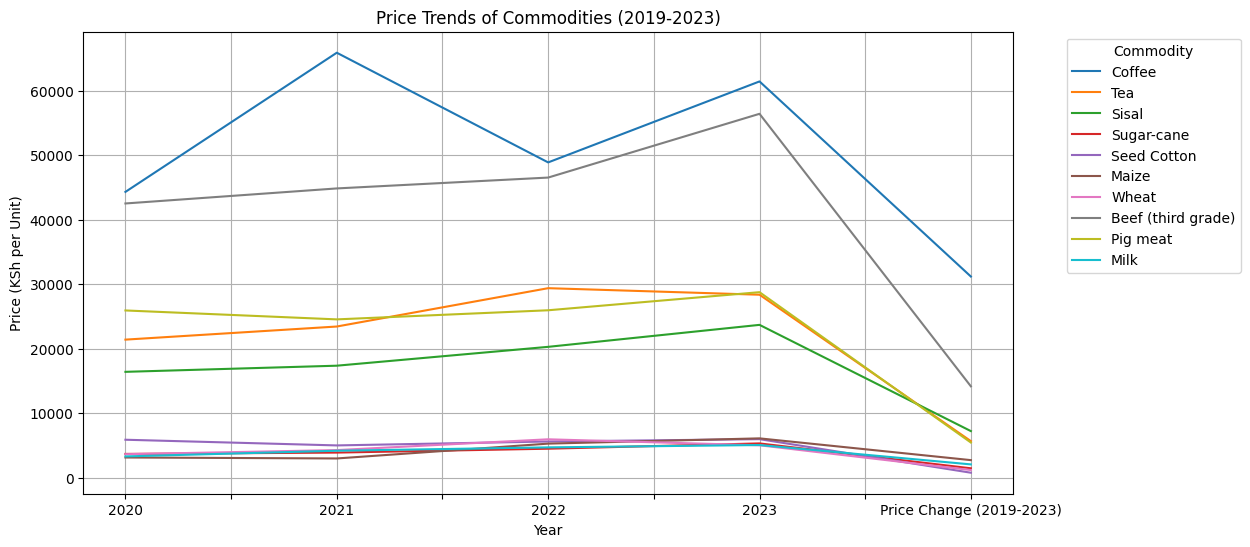

In [32]:
import matplotlib.pyplot as plt

# Plot the trend of each commodity over time
data.iloc[:, 2:].T.plot(figsize=(12, 6))  # Select only the price columns (2019-2023)
plt.title("Price Trends of Commodities (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Price (KSh per Unit)")
plt.legend(title="Commodity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Analyze Price Fluctuations and Averages

In [38]:
for col in [2019, 2020, 2021, 2022, 2023]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

average_prices = data.mean(axis=1, numeric_only=True)
average_prices

,0
Commodity,
Coffee,46978.781667
Tea,21830.928333
Sisal,16916.106667
Sugar-cane,3799.833333
Seed Cotton,4757.376667
Maize,3948.273333
Wheat,4003.101667
Beef (third grade),41111.876667
Pig meat,22329.438333


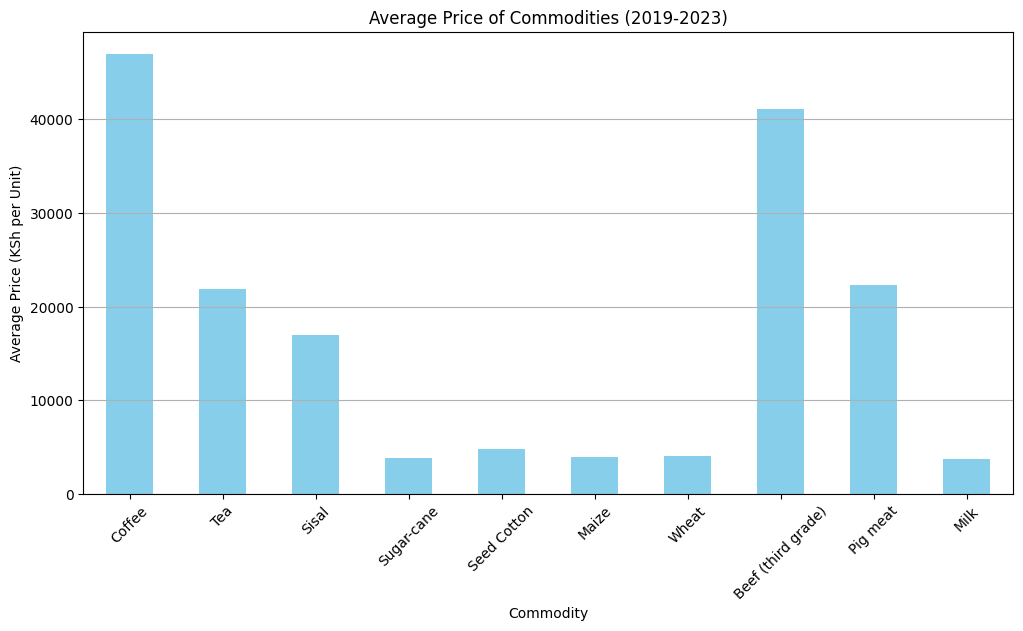

In [39]:
# Plot average prices
average_prices.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title("Average Price of Commodities (2019-2023)")
plt.xlabel("Commodity")
plt.ylabel("Average Price (KSh per Unit)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Forecast Potential Price Changes for 2024

            Commodity  Predicted Price for 2024
0              Coffee                 70220.340
1                 Tea                 30864.221
2               Sisal                 24357.619
3          Sugar-cane                  5393.900
4         Seed Cotton                  5944.172
5               Maize                  6480.096
6               Wheat                  5980.578
7  Beef (third grade)                 56209.370
8            Pig meat                 28991.669
9                Milk                  5734.565


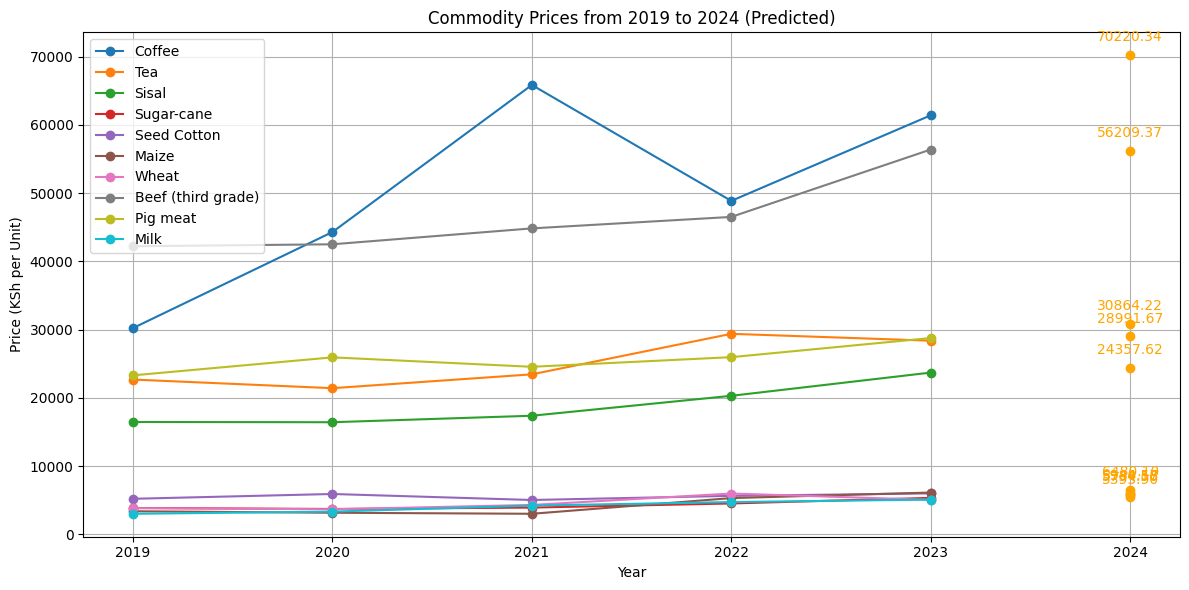

In [54]:
# Prepare the years for regression
years = np.array([2019, 2020, 2021, 2022, 2023]).reshape(-1, 1)  # Reshape for sklearn
predictions = {}

# Fit the model and predict prices for 2024
for index, row in data.iterrows():
    commodity = row['Commodity']
    prices = row[1:].values  # Extract prices from 2019 to 2023

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(years, prices)

    # Predict price for 2024
    predicted_price = model.predict(np.array([[2024]]))
    predictions[commodity] = predicted_price[0]

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(list(predictions.items()), columns=['Commodity', 'Predicted Price for 2024'])

# Display predictions DataFrame
print(predictions_df)

# Plotting historical prices and predicted prices for 2024
plt.figure(figsize=(12, 6))

# Plot historical prices
for index, row in data.iterrows():
    plt.plot(years, row[1:], marker='o', label=row['Commodity'])  # Historical prices

# Plot predicted prices for 2024
for index, row in predictions_df.iterrows():
    plt.plot(2024, row['Predicted Price for 2024'], marker='o', color='orange')  # Predicted price

# Annotate predicted prices
for index, row in predictions_df.iterrows():
    plt.annotate(f"{row['Predicted Price for 2024']:.2f}", (2024, row['Predicted Price for 2024']),
                 textcoords="offset points", xytext=(0,10), ha='center', color='orange')

plt.title("Commodity Prices from 2019 to 2024 (Predicted)")
plt.xlabel("Year")
plt.ylabel("Price (KSh per Unit)")
plt.xticks([2019, 2020, 2021, 2022, 2023, 2024])  # Include 2024 in the x-ticks
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()